In [29]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats

file = 'datasets/Colesterol.csv'
df = pd.read_csv(file)
df

,Total,HDL,Idade
0,177.0,69.0,25
1,249.0,49.0,37
2,167.0,20.0,40
3,202.0,59.0,23
4,186.0,74.0,25
5,NaN,74.0,25
6,NaN,45.0,36
7,NaN,51.0,31
8,NaN,46.0,27
9,NaN,11.0,44


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   24 non-null     float64
 1   HDL     24 non-null     float64
 2   Idade   29 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 828.0 bytes


In [31]:
df1 = df
df_filtered = df1.query('Total.notnull() and HDL.notnull() and Idade.notnull()')
df_filtered

,Total,HDL,Idade
0,177.0,69.0,25
1,249.0,49.0,37
2,167.0,20.0,40
3,202.0,59.0,23
4,186.0,74.0,25
15,211.0,15.0,25
16,174.0,48.0,21
17,198.0,55.0,21
18,261.0,75.0,45
19,250.0,58.0,34


Regressão com os dados sem pré-processamento

In [32]:
x = df_filtered[['Total', 'HDL']]
y = df_filtered['Idade'].to_numpy()

model = LinearRegression()
model.fit(x, y)

score = model.score(x, y)
print('R-quadrado:', score)

R-quadrado: 0.15171980214127057


In [33]:
# Vou começar a reconstruir o HDL
# Vou utilizar como variáveis Idade e Total

df_filtered = df1.query('Total.notnull() and HDL.notnull() and Idade.notnull()')
x = df_filtered[['Total']].to_numpy()
y = df_filtered['HDL'].to_numpy()
model_HDL = LinearRegression()
model_HDL.fit(x, y)
score = model_HDL.score(x, y)
score

0.031590450080245525

In [34]:
# minha função criada para completar o HDL de cada linha
def completar_HDL(linha):
  if pd.isna(linha['HDL']) and not pd.isna(linha['Total']):
    # Separa a variável regressora utilizada no modelo
    campos = linha[['Total']]
    # Retorna para o "apply" o valor previsto
    return round(model_HDL.predict([campos])[0])
  return linha['HDL']

# apply: executar a função chamada 1x para cada linha
df1['HDL_calculado'] = df1.apply(completar_HDL, axis=1)
df1

,Total,HDL,Idade,HDL_calculado
0,177.0,69.0,25,69.0
1,249.0,49.0,37,49.0
2,167.0,20.0,40,20.0
3,202.0,59.0,23,59.0
4,186.0,74.0,25,74.0
5,NaN,74.0,25,74.0
6,NaN,45.0,36,45.0
7,NaN,51.0,31,51.0
8,NaN,46.0,27,46.0
9,NaN,11.0,44,11.0


In [35]:
df_filtered = df1.query('Total.notnull() and HDL.notnull() and Idade.notnull()')
x = df_filtered[['HDL_calculado', 'Total']].to_numpy()
y = df_filtered['Idade'].to_numpy()
model_HDL = LinearRegression()
model_HDL.fit(x, y)
score = model_HDL.score(x, y)
print('R-quadrado:', score)

R-quadrado: 0.15171980214127057


Reconstruindo o Total

In [36]:
df_filtered = df1.query('Total.notnull() and HDL.notnull()')
x = df_filtered[['HDL_calculado']].to_numpy()
y = df_filtered['Total'].to_numpy()
model_Total = LinearRegression()
model_Total.fit(x, y)
score = model_Total.score(x, y)
print('R-quadrado:', score)

R-quadrado: 0.03159045008024597


In [37]:
# minha função criada para completar o Total de cada linha
def completar_Total(linha):
  if pd.isna(linha['Total']) and not pd.isna(linha['Idade']):
    # Separa as variáveis regressoras utilizadas no modelo
    campos = linha[['HDL_calculado']]
    # Retorna para o "apply" o valor previsto
    return round(model_Total.predict([campos])[0]) # type: ignore
  return linha['Total']

# apply: executar a função chamada 1x para cada linha
df1['Total_calculado'] = df1.apply(completar_Total, axis=1)
df1

,Total,HDL,Idade,HDL_calculado,Total_calculado
0,177.0,69.0,25,69.0,177.0
1,249.0,49.0,37,49.0,249.0
2,167.0,20.0,40,20.0,167.0
3,202.0,59.0,23,59.0,202.0
4,186.0,74.0,25,74.0,186.0
5,NaN,74.0,25,74.0,217.0
6,NaN,45.0,36,45.0,236.0
7,NaN,51.0,31,51.0,232.0
8,NaN,46.0,27,46.0,235.0
9,NaN,11.0,44,11.0,259.0


Resultados:

In [38]:
x = df1[['HDL_calculado', 'Total_calculado']].to_numpy()
y = df1['Idade'].to_numpy()
model_Total = LinearRegression()
model_Total.fit(x, y)
score = model_Total.score(x, y)
print('R-quadrado:', score)

R-quadrado: 0.14521340714040343


In [39]:
y_previsto = model.predict(x)

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Previsão'}, ylabel='Idade'>

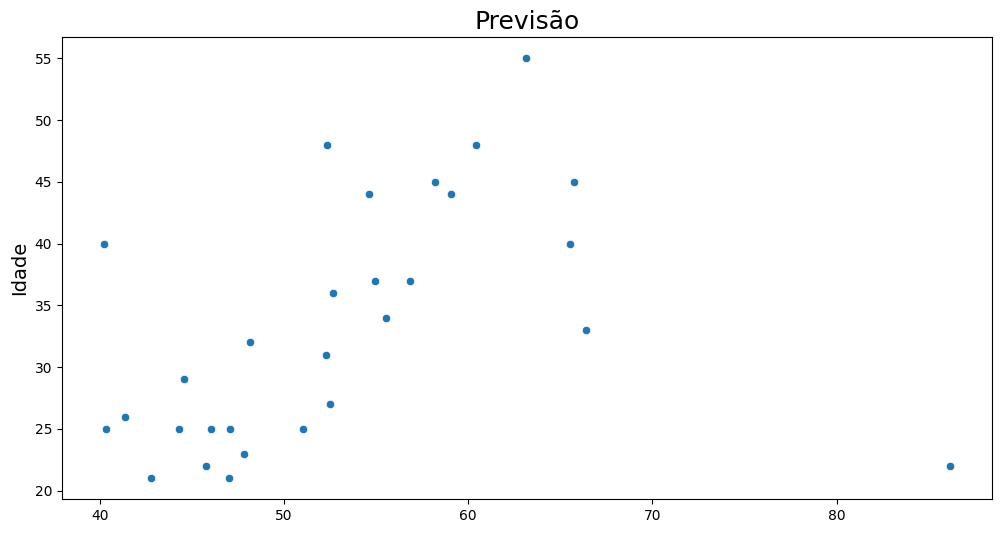

In [44]:
ax = sns.scatterplot(x = y_previsto, y = y)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão', fontsize=18)
ax.set_ylabel('Idade', fontsize=14)
ax